In [225]:
import matplotlib.pyplot as plt
import numpy as np

## Dot product

In [226]:
def dot(v : np.array, w : np.array) -> float:
    return v[0] * w[0] + v[1] * w[1] + v[2] * w[2]

## Cross Product

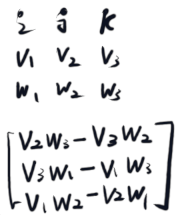

In [227]:
def cross(v : np.array, w : np.array) -> np.array:
    return np.array([
        v[1] * w[2] - v[2] * w[1],
        v[2] * w[0] - v[0] * w[2],
        v[0] * w[1] - v[1] * w[0]
    ])
cross(np.array([1,0,0]), np.array([0,1,0]))

array([0, 0, 1])

## Signed Area(Scalar Product Triplet)

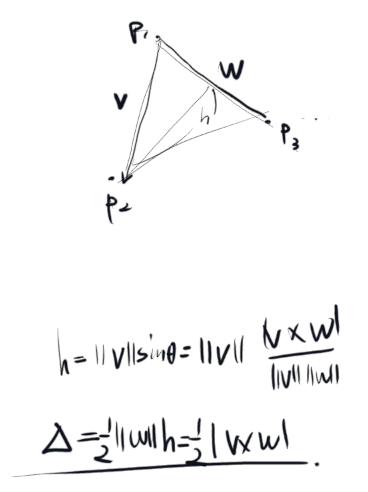

In [228]:
def signed_area(
        p1 : np.array, 
        p2 : np.array, 
        p3 : np.array, 
        e3 : np.array = np.array([0,0,1])) -> np.array:
    v = p2 - p1
    w = p3 - p1
    c = cross(v, w)
    orientation = np.sign(dot(c, e3))
    return np.linalg.norm(c) * 0.5 * orientation

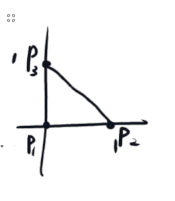
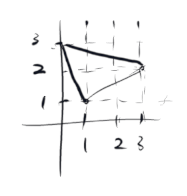

In [229]:
p1 = np.array([0, 0, 0])
p2 = np.array([1, 0, 0])
p3 = np.array([0, 1, 0])
print(signed_area(p1, p2, p3))
p1 = np.array([1, 1, 0])
p2 = np.array([3, 2, 0])
p3 = np.array([0, 3, 0])
print(signed_area(p1, p2, p3))
assert(abs(signed_area(p1, p2, p3) - (3*2 - 2*1*0.5 - 2*1*0.5 - 3*1*0.5)) < 1e-6)

0.5
2.5


## Barycentric Coordinate

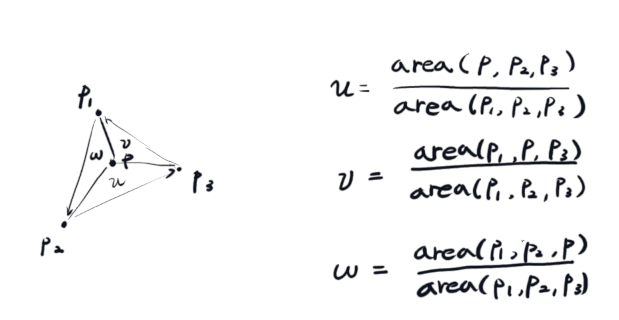
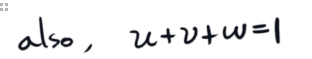

In [230]:
def bary(p1 : np.array, p2 : np.array, p3 : np.array, p : np.array) -> np.array:
    den = signed_area(p1, p2, p3)
    u = signed_area(p, p2, p3) / den
    v = signed_area(p1, p, p3) / den
    w = signed_area(p1, p2, p) / den
    assert( abs(u + v + w - 1) < 1e-6 )
    return np.array([u, v])

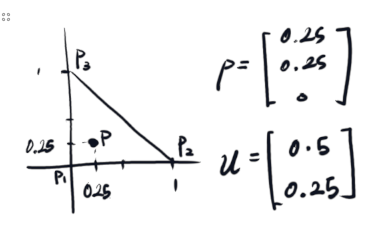

In [231]:
p1 = np.array([0, 0, 0])
p2 = np.array([1, 0, 0])
p3 = np.array([0, 1, 0])
p = np.array([0.25, 0.25, 0])
u = bary(p1, p2, p3, p)
print(p, u)

[0.25 0.25 0.  ] [0.5  0.25]


## Barycentric Coordinate to XYZ

In [232]:
def xyz_from_bary(p1 : np.array, p2 : np.array, p3 : np.array, u : np.array) -> np.array:
    return p1 * u[0] + p2 * u[1] + p3 * (1 - u[0] - u[1])

In [233]:
p1 = np.array([0, 0, 0])
p2 = np.array([1, 0, 0])
p3 = np.array([0, 1, 0])
assert((xyz_from_bary(p1, p2, p3, u) == p).all())

## Plot Barycentric Coordinates

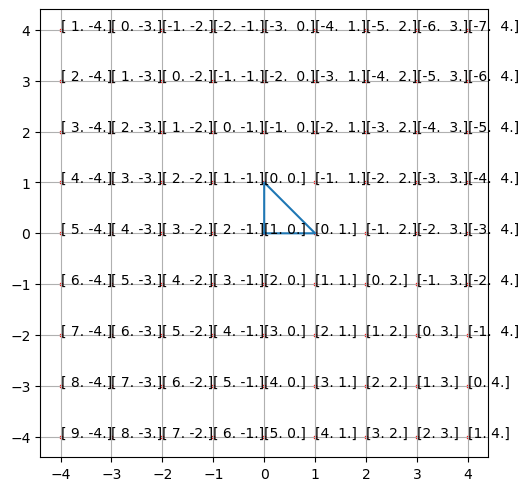

In [234]:
# 범위 내의 모든 좌표 가져오기
xs = np.linspace(-4, 4, 9)
ys = np.linspace(-4, 4, 9)
xs, ys = np.meshgrid(xs, ys, indexing='ij')
ps = np.vstack(np.stack((xs, ys, np.zeros_like(ys)), axis=2))
us = np.apply_along_axis(lambda p : bary(p1, p2, p3, p), axis=1, arr=ps)

# 서브플롯 한개
fig, ax = plt.subplots(layout="constrained")
ax.set_aspect(1)
# 삼각형
tri = np.column_stack((p1, p2, p3, p1))
ax.plot(tri[0], tri[1])
# uvs
ax.scatter(xs, ys, s=3, c='red')
for i in range(len(us)):
    u = us[i]
    p = ps[i]
    ax.annotate(f"{np.round(u,1)}", p[:2])
ax.grid(True)

## Plot $\bm{u} = (u, v, 1-u-v)$ separately

Text(0.5, 1.0, 'w')

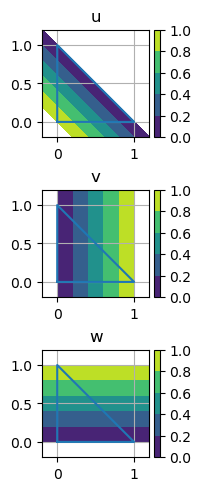

In [235]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

xs = np.linspace(-0.2, 1.2, 16, True)
ys = np.linspace(-0.2, 1.2, 16, True)
xs, ys = np.meshgrid(xs, ys, indexing='ij')
ps = np.vstack(np.stack((xs, ys, np.zeros_like(ys)), axis=2))
us = np.apply_along_axis(lambda p : bary(p1, p2, p3, p), axis=1, arr=ps)

fig, axs = plt.subplots(3, 1, layout="constrained")
levels = levels=np.linspace(0, 1, 6)

ax = axs[0]
ax.grid(True)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
co = ax.contourf(xs, ys, us[:,0].reshape(16,16), levels)
fig.colorbar(co, cax)
ax.set_aspect(1)
tri = np.column_stack((p1, p2, p3, p1))
ax.plot(tri[0], tri[1])
ax.set_title('u')

ax = axs[1]
ax.grid(True)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
co = ax.contourf(xs, ys, us[:,1].reshape(16,16), levels)
fig.colorbar(co, cax)
ax.set_aspect(1)
tri = np.column_stack((p1, p2, p3, p1))
ax.plot(tri[0], tri[1])
ax.set_title('v')

ax = axs[2]
ax.grid(True)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ws = 1 - (us[:,0]+us[:,1])
co = ax.contourf(xs, ys, ws.reshape(16,16), levels)
fig.colorbar(co, cax)
ax.set_aspect(1)
tri = np.column_stack((p1, p2, p3, p1))
ax.plot(tri[0], tri[1])
ax.set_title('w')


Text(0.5, 1.0, '7 Sections of Barycentric Coordinates')

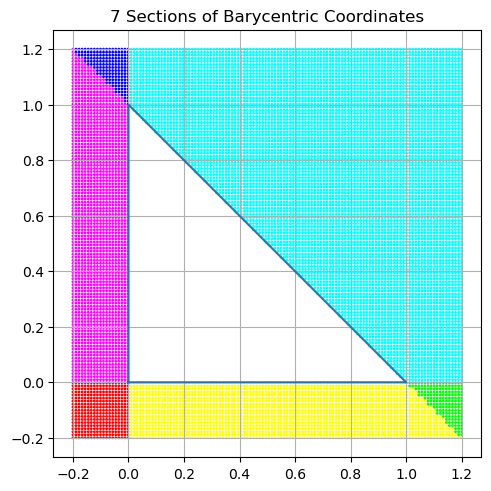

In [236]:
xs = np.linspace(-0.2, 1.2, 128, True)
ys = np.linspace(-0.2, 1.2, 128, True)
xs, ys = np.meshgrid(xs, ys, indexing='ij')
ps = np.vstack(np.stack((xs, ys, np.zeros_like(ys)), axis=2))
us = np.apply_along_axis(lambda p : bary(p1, p2, p3, p), axis=1, arr=ps)
us = np.column_stack((us, 1 - us[:,0] - us[:,1]))
assert(all([abs(np.sum(u)-1)<1e-6 for u in us]))
xx = xs.reshape(-1)
yy = ys.reshape(-1)
cs = []
for u in us:
    cs.append([
        0 if u[0] < 0 else 1,
        0 if u[1] < 0 else 1,
        0 if 1 - u[0] - u[1] < 0 else 1
    ])
fig, ax = plt.subplots(layout="constrained")
ax.grid(True)
ax.scatter(xx, yy, c=cs, s = 1)
ax.set_aspect(1)
tri = np.column_stack((p1, p2, p3, p1))
ax.plot(tri[0], tri[1])
ax.set_title('7 Sections of Barycentric Coordinates')


## Centroid

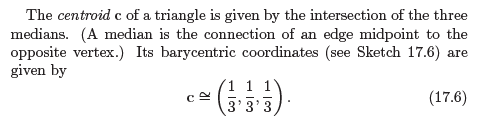

In [237]:
centroid = xyz_from_bary(p1, p2, p3, np.array([1.0/3.0, 1.0/3.0]))
print(centroid)
assert((abs(centroid - (p1 + p2 + p3)/3) < 1e-6).all())

[0.33333333 0.33333333 0.        ]


## Incenter
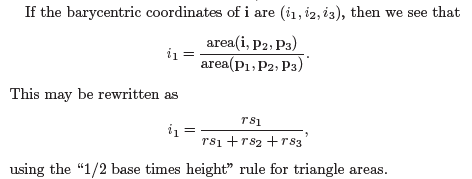
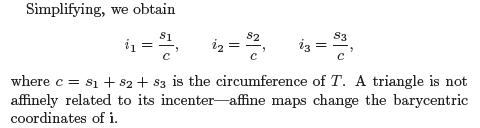
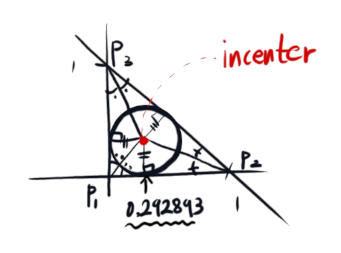

In [238]:
import math
s1 = np.linalg.norm(p3 - p2)
s2 = np.linalg.norm(p1 - p3)
s3 = np.linalg.norm(p2 - p1)
c = s1 + s2 + s3
i1 = s1 / c
i2 = s2 / c
incenter = xyz_from_bary(p1, p2, p3, np.array([i1, i2]))
print(incenter)
# what is radius of incircle?
w = incenter - p1
v = p2 - p1
def point_to_parametric_line_distance(
        p : np.array, 
        v : np.array, 
        r : np.array) -> float:
    w = r - p
    return np.linalg.norm(w) * math.sqrt(1 - dot(v,w)**2/dot(v,v)/dot(w,w))
radius = point_to_parametric_line_distance(p1, p2-p1, incenter)
print(radius)


[0.29289322 0.29289322 0.        ]
0.2928932188134524


## Circumcenter
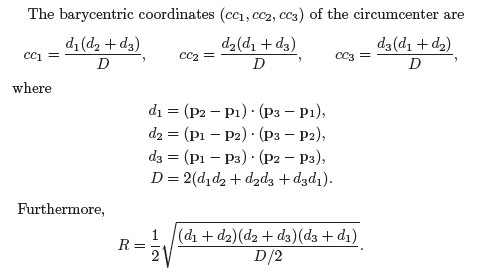
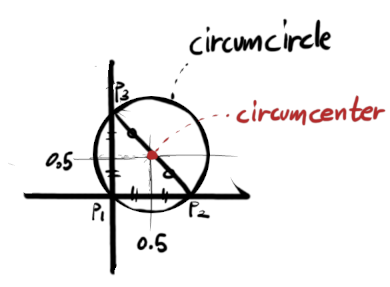

In [239]:
d1 = dot(p2-p1, p3-p1)
d2 = dot(p1-p2, p3-p2)
d3 = dot(p1-p3, p2-p3)
D = 2*(d1*d2 + d2*d3 + d3*d1)

cc1 = d1*(d2 + d3) / D
cc2 = d2*(d1 + d3) / D
cc3 = d3*(d1 + d2) / D
assert(abs(cc1 + cc2 + cc3 - 1) < 1e-6)

cc = xyz_from_bary(p1, p2, p3, np.array([cc1,cc2]))
print(cc)

[0.5 0.5 0. ]
